In [ ]:
import os

# Da togliere prima di consegnare
os.environ['KAGGLE_USERNAME'] = "lorenzoleoncini"
os.environ['KAGGLE_KEY'] = "ba465f032d52fccdc84a5416c30a9071"

!kaggle datasets download -d gsimonx37/letterboxd

Dataset URL: https://www.kaggle.com/datasets/gsimonx37/letterboxd
License(s): GPL-3.0
100% 21.3G/21.3G [04:13<00:00, 130MB/s]
100% 21.3G/21.3G [04:13<00:00, 90.3MB/s]


In [ ]:
#extraction
import zipfile
with zipfile.ZipFile('letterboxd.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

In [9]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_actors = pd.read_csv('data/actors.csv')
#df_countries = pd.read_csv('data/countries.csv')
#df_crew = pd.read_csv('data/crew.csv')
df_genres = pd.read_csv('data/genres.csv')
#df_languages = pd.read_csv('data/languages.csv')
df_movies = pd.read_csv('data/movies.csv')
#df_releases = pd.read_csv('data/releases.csv')
#df_studios = pd.read_csv('data/studios.csv')
#df_themes = pd.read_csv('data/themes.csv')

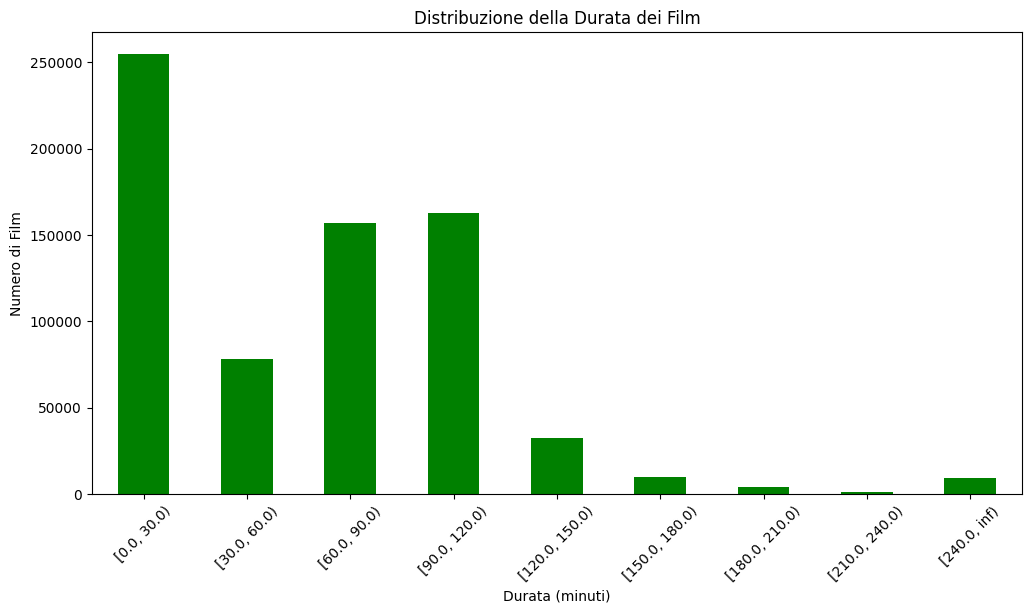

In [10]:
# Calcola il conteggio dei film per intervallo di durata (ogni 30 minuti)
duration_bins = pd.cut(df_movies['minute'], bins=np.append(np.arange(0, 240+30, 30), np.inf), right=False)
duration_counts = duration_bins.value_counts().sort_index()

# Visualizzazione della distribuzione della durata dei film con grafico a barre
plt.figure(figsize=(12, 6))
duration_counts.plot(kind='bar', color='green')
plt.title('Distribuzione della Durata dei Film')
plt.xlabel('Durata (minuti)')
plt.ylabel('Numero di Film')
plt.xticks(rotation=45)
plt.show()


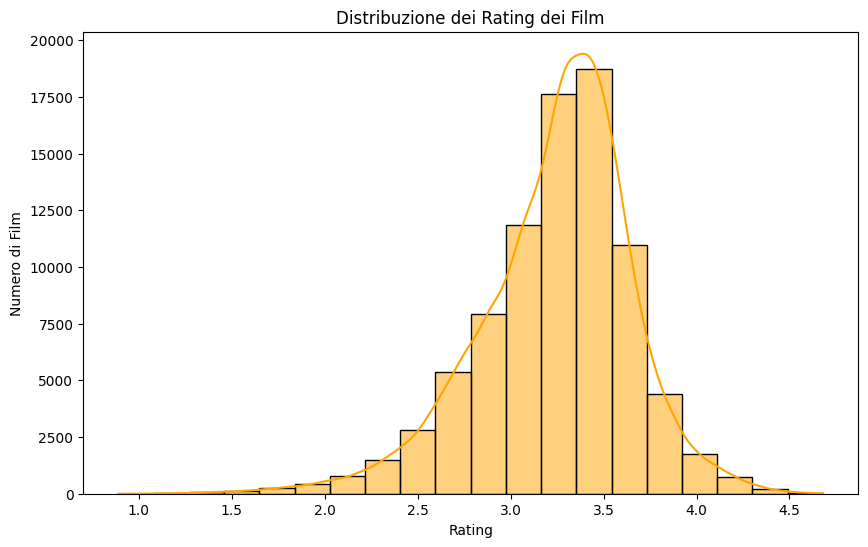

In [11]:
# Visualizzazione della distribuzione dei rating dei film
plt.figure(figsize=(10, 6))
sns.histplot(df_movies['rating'], bins=20, kde=True, color='orange')
plt.title('Distribuzione dei Rating dei Film')
plt.xlabel('Rating')
plt.ylabel('Numero di Film')
plt.show()


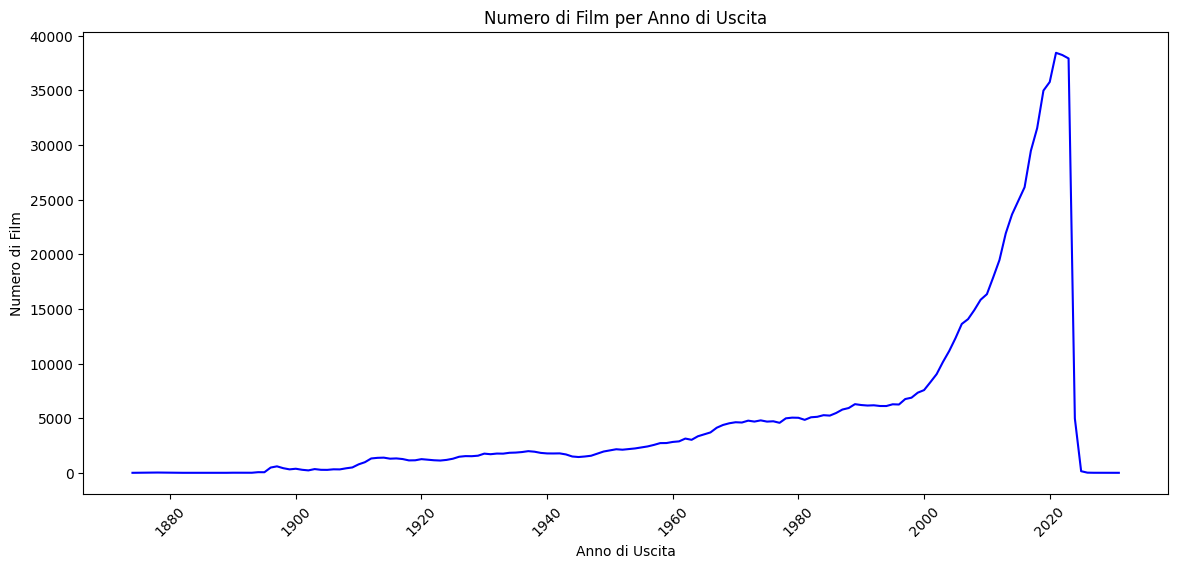

In [12]:
# Conteggio dei film per anno di uscita
release_year_counts = df_movies['date'].value_counts().sort_index()

# Visualizzazione del numero di film per anno di uscita
plt.figure(figsize=(14, 6))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, color='blue')
plt.title('Numero di Film per Anno di Uscita')
plt.xlabel('Anno di Uscita')
plt.ylabel('Numero di Film')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Unione dei dati sugli attori e sui film
df_actor_movies = pd.merge(df_actors, df_movies, how='inner', left_on='id', right_on='id')

# Unione con i generi cinematografici
df_actor_movies_genres = pd.merge(df_actor_movies, df_genres, how='inner', left_on='id', right_on='id')

In [14]:
# Definizione delle preferenze di genere degli attori
actor_genre_preferences = df_actor_movies_genres.groupby(['name_x', 'genre']).size().reset_index(name='count')
actor_genre_preferences = actor_genre_preferences.groupby(['name_x', 'genre'])['count'].sum().reset_index()
# Raggruppa per attore e somma i conteggi di ciascun genere
actor_preferred_genres = actor_genre_preferences.loc[actor_genre_preferences.groupby('name_x')['count'].idxmax()]

In [15]:
actor_genre_preferences.head()

,name_x,genre,count
0,!'aru Ikhuisi Piet Berendse,Documentary,1
1,!Xoma Ayob,Documentary,1
2,"""Aidan""",Documentary,1
3,"""Bowpicker"" Bob Merel",Comedy,1
4,"""Bowpicker"" Bob Merel",Documentary,1


In [16]:
# Raggruppa per attore e genere e somma i conteggi
actor_genre_matrix = actor_genre_preferences.groupby(['name_x', 'genre'])['count'].sum().unstack(fill_value=0)


In [17]:
actor_genre_matrix[actor_genre_matrix['TV Movie'] > 60 ]


genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
name_x,,,,,,,,,,,,,,,,,,,
Ed Asner,11,13,31,53,20,40,77,43,12,10,3,11,8,18,4,64,17,4,2
Peter Benson,4,5,0,20,21,0,44,4,3,6,4,1,23,28,3,62,15,0,0


In [18]:
from sklearn.preprocessing import StandardScaler

# Standardizzazione dei dati
scaler = StandardScaler()
actor_genre_matrix_scaled = scaler.fit_transform(actor_genre_matrix)


In [19]:
from sklearn.cluster import KMeans
# Definisci il numero di cluster
n_clusters = 40  # Puoi regolare questo numero in base alle tue esigenze

# Applicazione del clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
actor_clusters = kmeans.fit_predict(actor_genre_matrix_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
import pandas as pd

# Aggiungi i cluster al DataFrame originale
actor_genre_matrix['Cluster'] = actor_clusters


In [45]:
# Conta quanti attori ci sono in ciascun cluster
cluster_counts = actor_genre_matrix['Cluster'].value_counts()
print(cluster_counts)

Cluster
36    819404
0     197009
34     76407
27     71210
16     69191
18     46603
22     36758
14     19909
9      12721
15      7122
5       7020
3       5520
32      3357
23      3244
24      3204
7       3020
12      2280
19      1795
38      1316
31      1255
2        894
30       878
17       858
6        738
37       707
1        616
11       553
35       410
28       264
29       195
33       194
25       164
21       118
10       117
13        89
39        69
26        54
8         43
4         16
20         1
Name: count, dtype: int64


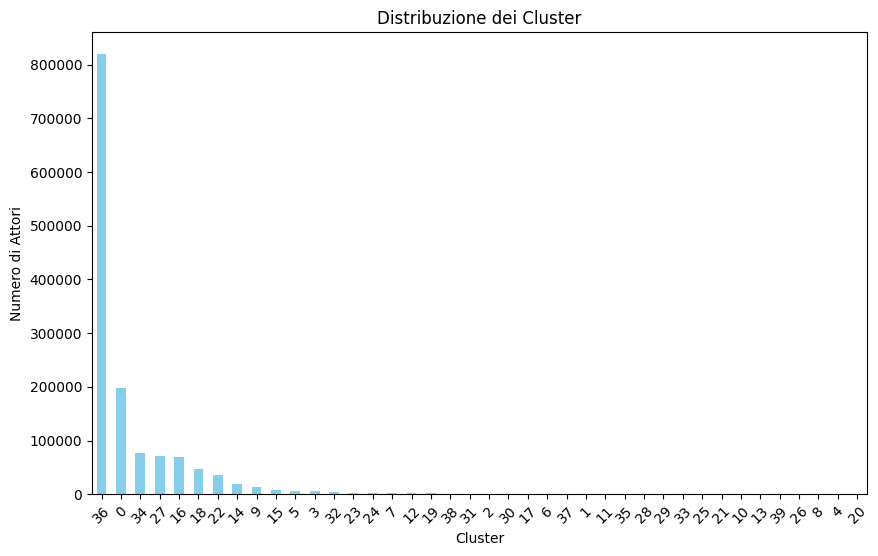

In [59]:
# Visualizzazione della distribuzione dei cluster con un grafico a barre
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuzione dei Cluster')
plt.xlabel('Cluster')
plt.ylabel('Numero di Attori')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Calcola la media delle preferenze di genere per ogni cluster
cluster_profiles = actor_genre_matrix.groupby('Cluster').mean()

In [47]:
# Visualizza il profilo di ogni cluster
print(cluster_profiles)

genre       Action  Adventure    Animation      Comedy      Crime  \
Cluster                                                             
0         0.032339   0.026572     0.019471    0.166541   0.041074   
1        22.534091  11.943182     3.071429   25.883117  16.581169   
2         5.614094   1.626398     0.231544    9.159955   2.950783   
3         2.115036   1.117391     0.282971    7.272283   3.295833   
4        59.312500  72.687500   192.750000   92.562500   8.875000   
5         1.942735   1.636610     0.165670    5.504558   2.127635   
6         6.833333   6.065041     0.119241   10.205962   5.501355   
7         7.141060   3.594040     0.691722   14.443046   9.829801   
8        28.279070  14.418605     0.046512   21.116279  11.511628   
9         3.882871   1.268925     0.175222    6.807562   4.110133   
10       41.427350  24.358974   116.794872   39.427350   6.914530   
11        3.858951   7.549729     9.354430   42.549729   6.043400   
12        0.778509   0.596053     

In [60]:
# Calcola le preferenze medie per ciascun cluster
cluster_genre_preferences = actor_genre_matrix.groupby('Cluster').mean()

# Visualizza le preferenze di genere dominanti per ciascun cluster
print("Preferenze di genere dominanti per ciascun cluster:")
print(cluster_genre_preferences)

Preferenze di genere dominanti per ciascun cluster:
genre       Action  Adventure    Animation      Comedy      Crime  \
Cluster                                                             
0         0.032339   0.026572     0.019471    0.166541   0.041074   
1        22.534091  11.943182     3.071429   25.883117  16.581169   
2         5.614094   1.626398     0.231544    9.159955   2.950783   
3         2.115036   1.117391     0.282971    7.272283   3.295833   
4        59.312500  72.687500   192.750000   92.562500   8.875000   
5         1.942735   1.636610     0.165670    5.504558   2.127635   
6         6.833333   6.065041     0.119241   10.205962   5.501355   
7         7.141060   3.594040     0.691722   14.443046   9.829801   
8        28.279070  14.418605     0.046512   21.116279  11.511628   
9         3.882871   1.268925     0.175222    6.807562   4.110133   
10       41.427350  24.358974   116.794872   39.427350   6.914530   
11        3.858951   7.549729     9.354430   42.549

In [72]:
import random

def recommend_movies_for_actor(actor_name, num_recommendations=5):
    # Trova il cluster dell'attore
    actor_cluster = actor_genre_matrix.loc[actor_name, 'Cluster']

    # Ottieni i generi preferiti dal cluster dell'attore
    preferred_genres = cluster_genre_preferences.loc[actor_cluster]

    # Ottieni i top generi raccomandati
    top_genres = preferred_genres.nlargest(num_recommendations).index.tolist()

    # Filtra i film basati sui generi preferiti, il rating e escludi quelli in cui l'attore ha recitato
    recommended_movies = df_actor_movies_genres[
        (df_actor_movies_genres['genre'].isin(top_genres)) &
        (df_actor_movies_genres['rating'] > 3) &  # Filtro per rating > 3
        ~(df_actor_movies_genres['name_x'] == actor_name)  # Escludi film in cui l'attore ha recitato
    ]

    # Rimuovi eventuali duplicati basati sull'ID del film
    recommended_movies = recommended_movies.drop_duplicates(subset=['id'])

    # Se ci sono più film disponibili di quelli richiesti, seleziona casualmente i film raccomandati
    if len(recommended_movies) > num_recommendations:
        recommended_movies = recommended_movies.sample(n=num_recommendations)

    return recommended_movies

# Esempio di raccomandazione per un attore specifico
print(recommend_movies_for_actor('Ed Asner', num_recommendations=5))




              id           name_x                            name_y    date  \
3643868  1101060    Matteo Simoni                              Trio  2019.0   
3299986  1085196   Shin Dong-hoon                      Missing Nine  2017.0   
3450250  1091960  Fandy Christian                              7/24  2014.0   
2728102  1061346       Shashikala                              Waqt  1965.0   
2494716  1052613     Judith Furse  The Adventures of Barry McKenzie  1972.0   

                                                   tagline  \
3643868                                                NaN   
3299986                                                NaN   
3450250     The foundation of everything is a good family.   
2728102  The Moving Finger writes; and, having writ, mo...   
2494716                                                NaN   

                                               description  minute  rating  \
3643868  Wim, a loner who prefers to stay in and binge ...    94.0    3.31